In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


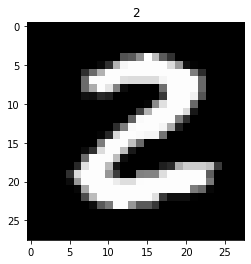

In [0]:
#just to visualize the image in grayscale. 
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(26):
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])

In [0]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.utils import np_utils
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


A.Build basic Single Layer Perceptron on the MNIST Data. 
HINT:
> 1.SingleDense 1024 Neurons
> 2.InputShapeBeing784ActivationFunctionRelu.
> 3.SoftmaxLayerWith10NeuronAsOutput
> 4.Loss-Categorical_Crossentropy
> 5.Optimizer-RMSPROP6.Batch_Size=5000,Epochs=507.
PrintTheAccuracyAndLossOfSLPModelOutput(Architecture):-


In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
# some parameters
batch_sizes = 5000
nb_epochs = 50
input_dim = 784
output_dim = 10

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 5s 79us/step - loss: 1.0129 - acc: 0.6986 - val_loss: 0.4931 - val_acc: 0.8677
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.4344 - acc: 0.8761 - val_loss: 0.3299 - val_acc: 0.9133
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 

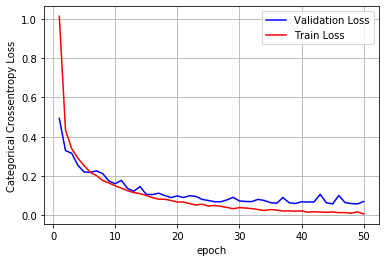

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))
plot_model(model, to_file='singlelayermodel_plot.png', show_shapes=True, show_layer_names=True)
print(model.summary())

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size= batch_sizes, epochs=nb_epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
!ls

sample_data  singlelayermodel_plot.png


# MLP

In [0]:
from keras.initializers import TruncatedNormal, VarianceScaling, glorot_normal

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 156us/step - loss: 1.3293 - acc: 0.6394 - val_loss: 0.4565 - val_acc: 0.8700
Epoch 2/50
60000/60000 [=========================

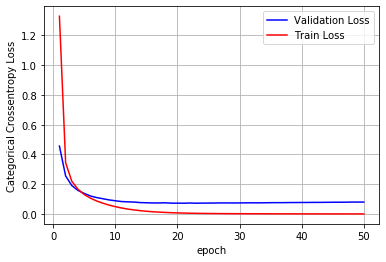

In [0]:
model1 = Sequential()
model1.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model1.add(Dense(512, activation= 'relu', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.125, seed=None)))
model1.add(Dense(512, activation= 'relu', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.125, seed=None)))
model1.add(Dense(output_dim, activation='softmax'))
plot_model(model1, to_file='multiplelayermodel_plot.png', show_shapes=True, show_layer_names=True)
print(model1.summary())

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train, y_train, batch_size= batch_sizes, epochs=nb_epochs, verbose=1, validation_data=(x_test, y_test))

score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test loss :', score[0]) 
print('Test accuracy :', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#from google.colab import files
#files.download("multiplelayermodel_plot.png")    

# CNN

In [0]:
from __future__ import print_function
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 35s 575us/step - loss: 0.2753 - acc: 0.9158 - val_loss: 0.0928 - val_acc: 0.9719
Epoch 2/12
60000/60000 [==============================] - 34s 563us/step - loss: 0.0870 - acc: 0.9740 - val_loss: 0.0563 - val_acc: 0.9818
Epoch 3/12
60000/60000 [==============================] - 33s 558us/step - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0514 - val_acc: 0.9834
Epoch 4/12
60000/60000 [==============================] - 33s 558us/step - loss: 0.0488 - acc: 0.9853 - val_loss: 0.0450 - val_acc: 0.9857
Epoch 5/12
60000/60000 [==============================] - 33s 555us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0404 - val_acc: 0.9860
Epoch 6/12
60000/60000 [=======

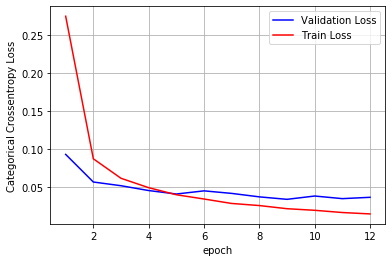

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
plot_model(model, to_file='CNNlayermodel_plot.png', show_shapes=True, show_layer_names=True)
model.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.Adadelta(),\
              metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [0]:
from google.colab import files
files.download("CNNlayermodel_plot.png")    

In [11]:
import json

model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)
print("thus the model has saved its architecture")

model.save_weights("CNN_MNITmodelweights.h5")
print("thus the model have saved the weights")

thus the model has saved its architecture
thus the model have saved the weights


In [0]:
from google.colab import files
files.download("model.json")

In [16]:
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 28, 28

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_MNITmodelweights.h5")
plot_model(loaded_model, to_file='loaded_CNNlayermodel_plot.png', show_shapes=True, show_layer_names=True)
print("Loaded model from disk")

Loaded model from disk


In [17]:
!ls

CNNlayermodel_plot.png	 loaded_CNNlayermodel_plot.png	sample_data
CNN_MNITmodelweights.h5  model.json


In [0]:
from google.colab import files
files.download("loaded_CNNlayermodel_plot.png")